In [ ]:
import pandas as pd                 #dataframes, I/O of csv/excel files
import numpy as np                  #arrays, mathematical functions
import statsmodels.api as sm        #basic statiscal analysis, linear & logistic regression
import seaborn as sns               #visualization

In [ ]:
dev_data = pd.read_csv('raw-data_assgn_transformed.csv')

In [ ]:
dev_data.shape

(2409, 76)

In [ ]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 76 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Num                                            2409 non-null   int64  
 1   Networth Next Year                             2409 non-null   float64
 2   Default                                        2409 non-null   int64  
 3   Total assets                                   2409 non-null   float64
 4   Net worth                                      2409 non-null   float64
 5   Total Income                                   2409 non-null   float64
 6   Total Income/Total assets                      2409 non-null   float64
 7   Change in stock                                2409 non-null   float64
 8   Change in stock/Total Income                   2409 non-null   float64
 9   Total expenses                                 2409 

In [ ]:
dev_data.isnull().sum().sum()           #number of null values

0

In [ ]:
dev_data['Default'].value_counts(normalize=True)      #Proportion  # Default - 1 and non- default -0

0    0.929846
1    0.070154
Name: Default, dtype: float64

In [ ]:
dev_data['Default'].value_counts()                    #Frequency

0    2240
1     169
Name: Default, dtype: int64

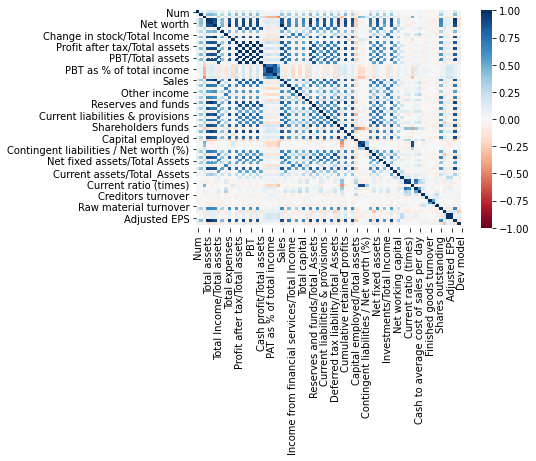

In [ ]:
sns.heatmap(dev_data.corr(), cmap= 'RdBu', vmin=-1)  # Correlation heatmap range -1 to +1

In [ ]:
dev_data_select = dev_data[[                   # Taken values from Balance sheet , P&L from here only consider ratios.
'Default',
'Total Income/Total assets',
'Change in stock/Total Income',
'Profit after tax/Total assets',
'PBDITA/Total assets',
'PBT/Total assets',
'Cash profit as % of total income',
'PBT as % of total income',
'PAT as % of total income',
'Sales/Total assets',
'Income from financial services/Total Income',
'Other income/Total Income',
'Total capital/Total_Assets',
'Reserves and funds/Total_Assets',
'Borrowings/Total_Assets',
'Current liabilities & provisions/Total_assets',
'Deferred tax liability/Total_Assets',
'Shareholders funds/Total_assets',
'Cumulative retained profits/Total Income',
'Capital employed/Total assets',
'Contingent liabilities/Total Assets',
'Net fixed assets/Total Assets',
'Investments/Total Income',
'Current assets/Total_Assets',
'Net working capital/Total Capital',
'Quick ratio (times)',
'Current ratio (times)',
'Debt to equity ratio (times)',
'EPS']]

dev_data_select.shape

(2409, 29)

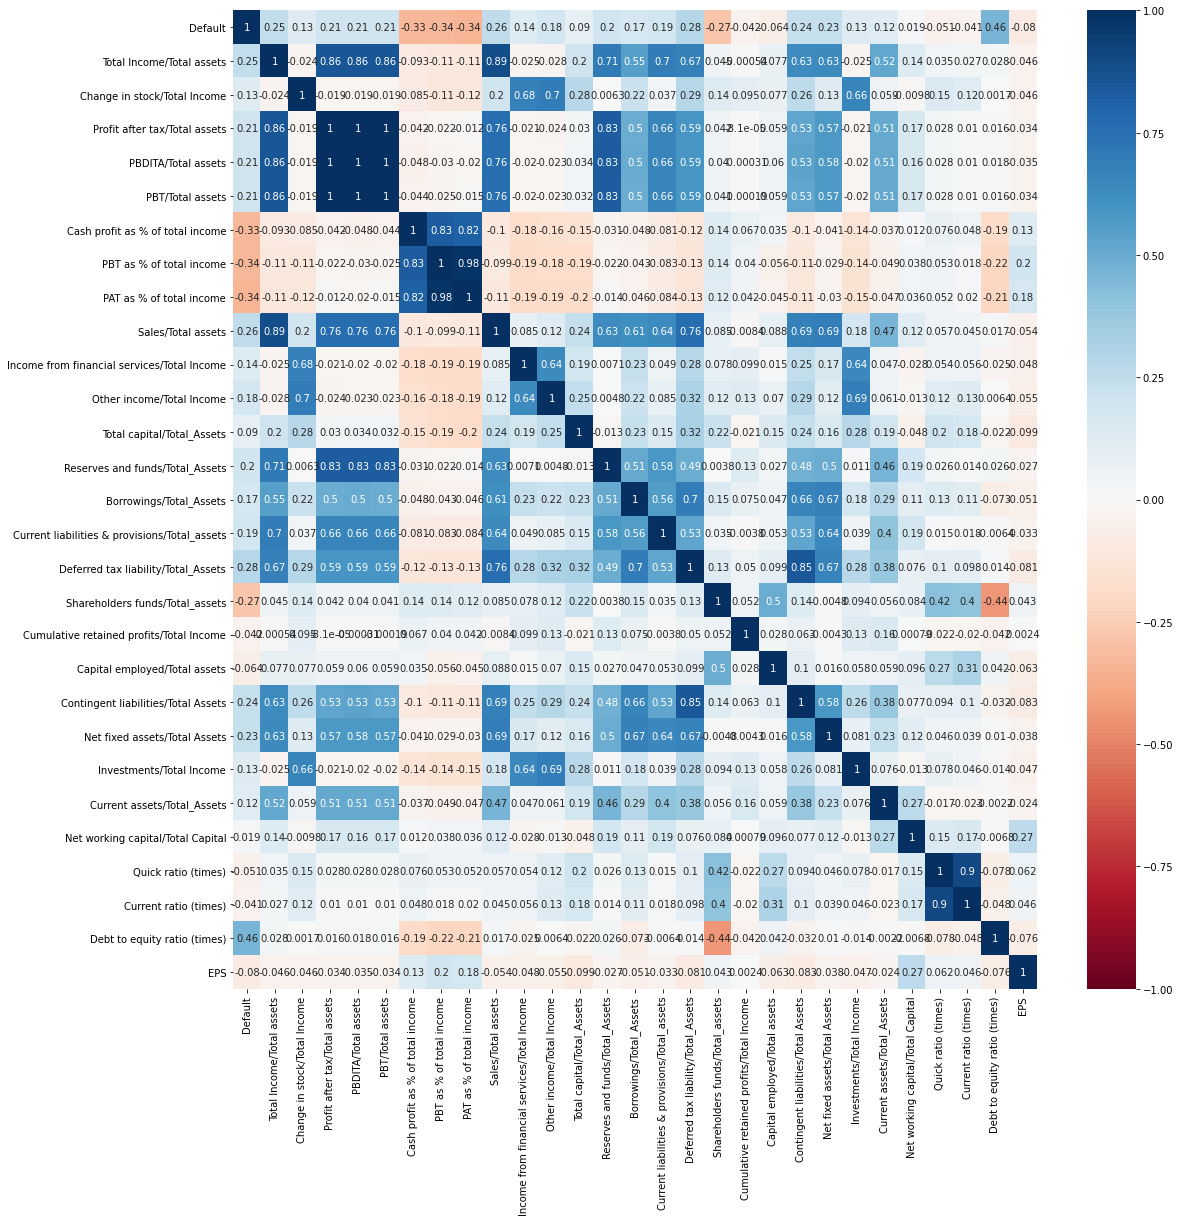

In [ ]:
import matplotlib.pyplot as plt     # TO find highly correlate variables each othe.

plt.figure(figsize = (i,18))
sns.heatmap(dev_data_select.corr() , vmin = -1 , cmap = 'RdBu', annot = True)

In [ ]:
# Variables removed           # Removed some of the highly correlated variables
#'PBDITA/Total assets',        #Out of 76 variable 26 used to crete correlation map again. From this removed highly correlated variables again.
#'PBT/Total assets',           # Finally 22 varaibales are not highly correlated each other.
#'PBT as % of total income',
#'Quick ratio (times)',
#'Total Income/Total assets',
#'Cash profit as % of total income',
#'Contingent liabilities/Total Assets',

dev_data_select = dev_data[[
'Default',
'Change in stock/Total Income',
'Profit after tax/Total assets',
'PAT as % of total income',
'Sales/Total assets',
'Income from financial services/Total Income',
'Other income/Total Income',
'Total capital/Total_Assets',
'Reserves and funds/Total_Assets',
'Borrowings/Total_Assets',
'Current liabilities & provisions/Total_assets',
'Deferred tax liability/Total_Assets',
'Shareholders funds/Total_assets',
'Cumulative retained profits/Total Income',
'Capital employed/Total assets',
'Net fixed assets/Total Assets',
'Investments/Total Income',
'Current assets/Total_Assets',
'Net working capital/Total Capital',
'Current ratio (times)',
'Debt to equity ratio (times)',
'EPS']]

dev_data_select.shape

(2409, 22)

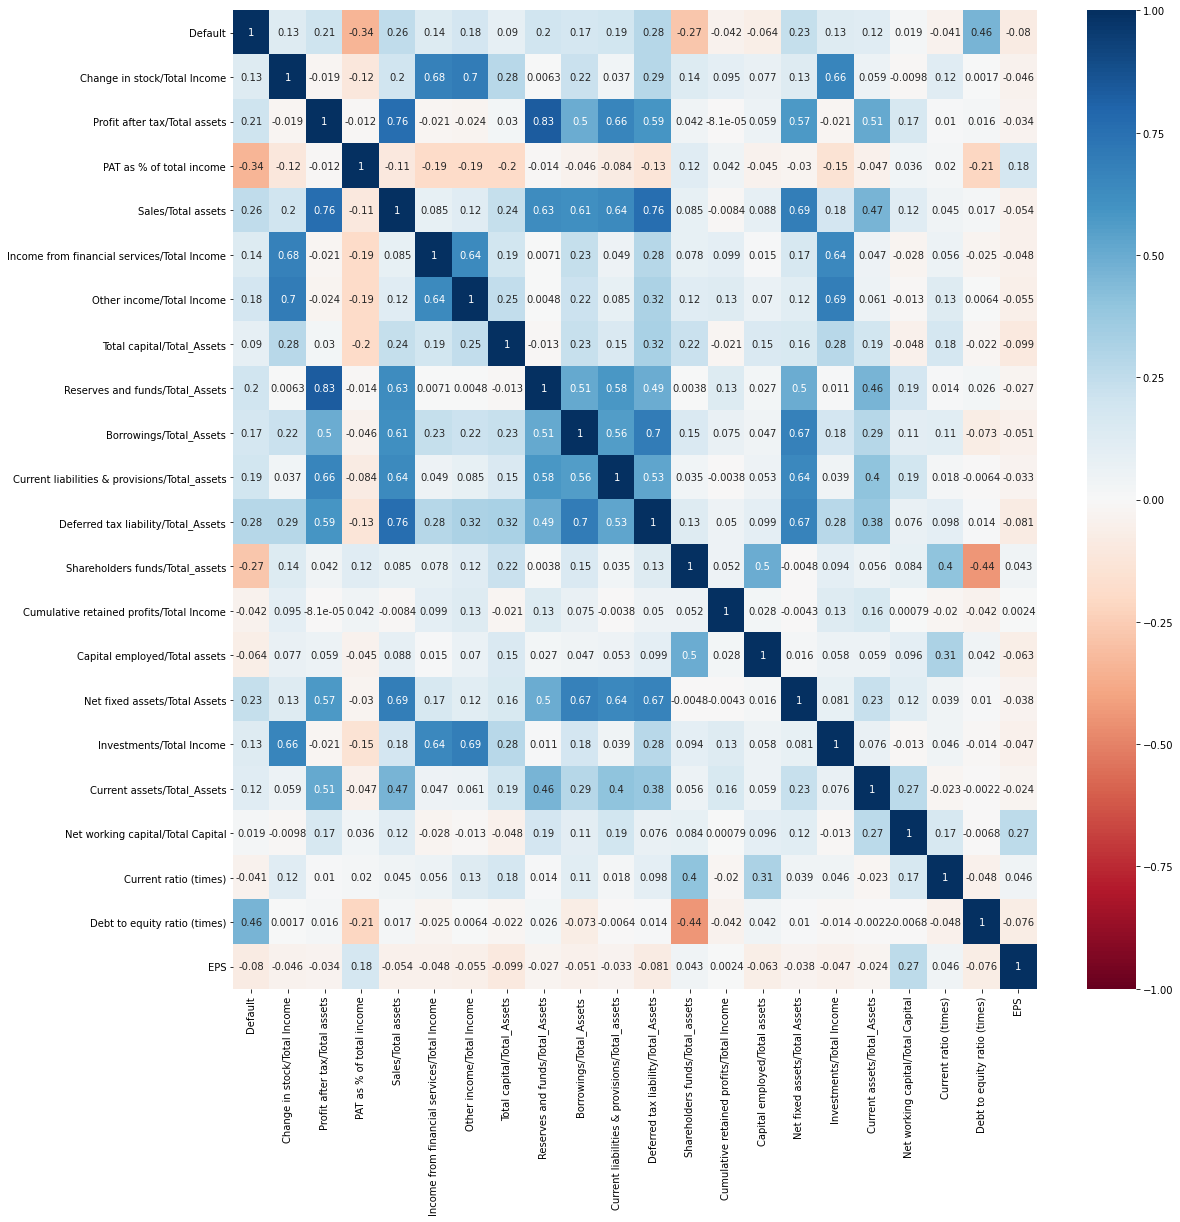

In [ ]:
plt.figure(figsize = (18,18))  # Here, create a heatmap with selected 22 variables.
sns.heatmap(dev_data_select.corr() , vmin = -1 , cmap = 'RdBu', annot = True)

In [ ]:
dev_data_select = sm.tools.tools.add_constant(dev_data_select)

dev_data_select.head()  # Added const because my model will not through any error.

,const,Default,Change in stock/Total Income,Profit after tax/Total assets,PAT as % of total income,Sales/Total assets,Income from financial services/Total Income,Other income/Total Income,Total capital/Total_Assets,Reserves and funds/Total_Assets,Borrowings/Total_Assets,Current liabilities & provisions/Total_assets,Deferred tax liability/Total_Assets,Shareholders funds/Total_assets,Cumulative retained profits/Total Income,Capital employed/Total assets,Net fixed assets/Total Assets,Investments/Total Income,Current assets/Total_Assets,Net working capital/Total Capital,Current ratio (times),Debt to equity ratio (times),EPS
0,1.0,1,-0.005406,-0.009487,-28.7076,0.058416,0.012425,0.016782,0.031205,0.190949,0.471956,0.227577,0.0243,0.078541,-0.402369,0.550497,0.356424,2.785461,0.280381,-2.783425,0.72,26.78,-13.7332
1,1.0,1,0.001579,-0.005677,-11.5200,0.992421,0.009506,0.008104,0.035857,0.018638,0.454186,0.305729,0.0068,0.053313,-0.014696,0.432872,0.426465,0.149651,0.105641,-1.449368,0.26,12.98,-13.7332
2,1.0,1,0.029449,-0.012448,-23.6600,0.155672,0.001005,0.000042,0.194215,-0.013898,0.509149,0.038946,0.0149,0.451905,-0.178117,0.949240,0.903432,0.000126,0.089962,0.166246,1.00,13.31,-4.5500
3,1.0,1,0.004458,-0.032186,-5.9000,0.801522,0.008874,0.001875,0.070823,0.304375,0.319313,0.305489,0.0385,0.070874,-0.013685,0.390187,0.623688,0.072717,0.226176,-3.442088,0.48,5.48,-7.9500
4,1.0,1,0.002171,-0.055891,-10.6600,1.012633,0.023542,0.000087,0.293100,-0.066880,0.629023,0.191248,0.0669,0.179729,-0.144332,0.808752,0.608008,0.202887,0.354212,-0.429100,0.74,15.91,-5.8700


In [ ]:
train_features = (dev_data_select.columns).tolist()
train_features.remove('Default')

features_columns=train_features
Target_val='Default'


In [ ]:
logit_model_attempt1 = sm.Logit(dev_data_select[Target_val],dev_data_select[features_columns])
result_attempt1 = logit_model_attempt1.fit()
print(result_attempt1.summary())

Optimization terminated successfully.
         Current function value: 0.127800
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2409
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           21
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.4969
Time:                        07:14:53   Log-Likelihood:                -307.87
converged:                       True   LL-Null:                       -611.97
Covariance Type:            nonrobust   LLR p-value:                3.004e-115
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                 

In [ ]:
result_attempt1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2409
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           21
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.4969
Time:                        07:15:51   Log-Likelihood:                -307.87
converged:                       True   LL-Null:                       -611.97
Covariance Type:            nonrobust   LLR p-value:                3.004e-115
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6179      0.380     -4.259      0.000      -2.362      -0.873
Change in stock/Total Income                      0.0195      0.012      1.581      0.114      -0.005       0.044
Profit after tax/Total assets                     0.0576      0.035      1.644      0.100      -0.011       0.126
PAT as % of total income                         -0.0987      0.010     -9.899      0.000      -0.118      -0.079
Sales/Total assets                                0.0003      0.001      0.198      0.843      -0.003       0.003
Income from financial services/Total Income      -0.0030      0.006     -0.517      0.605      -0.015       0.008
Other income/Total Income                         0.0168      0.012      1.419      0.156      -0.006       0.040
Total capital/Total_Assets                        0.0997      0.117      0.856      0.392      -0.129       0.328
Reserves and funds/Total_Assets                  -0.0044      0.008     -0.560      0.575      -0.020       0.011
Borrowings/Total_Assets                           0.0053      0.005      1.164      0.245      -0.004       0.014
Current liabilities & provisions/Total_assets    -0.0064      0.008     -0.777      0.437      -0.022       0.010
Deferred tax liability/Total_Assets               0.0569      0.023      2.485      0.013       0.012       0.102
Shareholders funds/Total_assets                  -6.5006      0.937     -6.935      0.000      -8.338      -4.664
Cumulative retained profits/Total Income         -0.0069      0.011     -0.627      0.531      -0.028       0.015
Capital employed/Total assets                     0.0870      0.621      0.140      0.889      -1.129       1.303
Net fixed assets/Total Assets                 -8.279e-05      0.005     -0.015      0.988      -0.011       0.011
Investments/Total Income                         -0.0006      0.001     -0.798      0.425      -0.002       0.001
Current assets/Total_Assets                      -0.0003      0.006     -0.060      0.952      -0.012       0.011
Net working capital/Total Capital                -0.0033      0.008     -0.387      0.699      -0.020       0.013
Current ratio (times)                            -0.1132      0.085     -1.338      0.181      -0.279       0.053
Debt to equity ratio (times)                      0.0901      0.020      4.436      0.000       0.050       0.130
EPS                                              -0.0027      0.004     -0.735      0.462      -0.010       0.005
=================================================================================================================
"""

In [ ]:
dev_data_select2 = dev_data[[
'Default',
'PAT as % of total income',
'Deferred tax liability/Total_Assets',
'Shareholders funds/Total_assets',
'Debt to equity ratio (times)',
]]

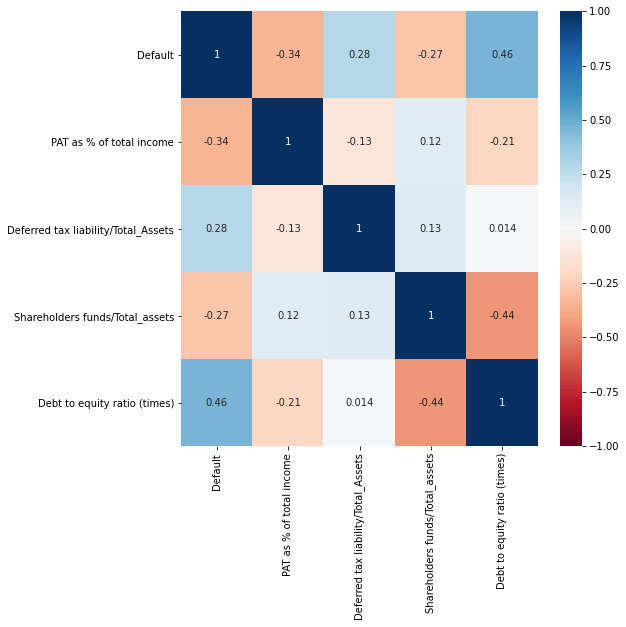

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(dev_data_select2.corr() , vmin = -1 , cmap = 'RdBu', annot = True)

In [ ]:
dev_data_select2 = sm.tools.tools.add_constant(dev_data_select2)

dev_data_select2.head()

,const,Default,PAT as % of total income,Deferred tax liability/Total_Assets,Shareholders funds/Total_assets,Debt to equity ratio (times)
0,1.0,1,-28.7076,0.0243,0.078541,26.78
1,1.0,1,-11.5200,0.0068,0.053313,12.98
2,1.0,1,-23.6600,0.0149,0.451905,13.31
3,1.0,1,-5.9000,0.0385,0.070874,5.48
4,1.0,1,-10.6600,0.0669,0.179729,15.91


In [ ]:
train_features = (dev_data_select2.columns).tolist()
train_features.remove('Default')

features_columns=train_features

In [ ]:
logit_model_attempt2 = sm.Logit(dev_data_select2[Target_val],dev_data_select2[features_columns])
result_attempt2 = logit_model_attempt2.fit()
print(result_attempt2.summary())

Optimization terminated successfully.
         Current function value: 0.131435
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2409
Model:                          Logit   Df Residuals:                     2404
Method:                           MLE   Df Model:                            4
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.4826
Time:                        07:18:10   Log-Likelihood:                -316.63
converged:                       True   LL-Null:                       -611.97
Covariance Type:            nonrobust   LLR p-value:                1.604e-126
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.8162      0.248 

In [ ]:
result_attempt2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2409
Model:                          Logit   Df Residuals:                     2404
Method:                           MLE   Df Model:                            4
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.4826
Time:                        07:18:35   Log-Likelihood:                -316.63
converged:                       True   LL-Null:                       -611.97
Covariance Type:            nonrobust   LLR p-value:                1.604e-126
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.8162      0.248     -7.336      0.000      -2.301      -1.331
PAT as % of total income               -0.1021      0.009    -11.393      0.000      -0.120      -0.085
Deferred tax liability/Total_Assets     0.0954      0.011      8.419      0.000       0.073       0.118
Shareholders funds/Total_assets        -6.0894      0.753     -8.085      0.000      -7.566      -4.613
Debt to equity ratio (times)            0.0941      0.019      5.076      0.000       0.058       0.130
=======================================================================================================
"""

In [ ]:
dev_data_select3 = dev_data[[
'Default',
'PAT as % of total income',
'Deferred tax liability/Total_Assets',
'Shareholders funds/Total_assets',
'Debt to equity ratio (times)',
'Cumulative retained profits/Total Income']]

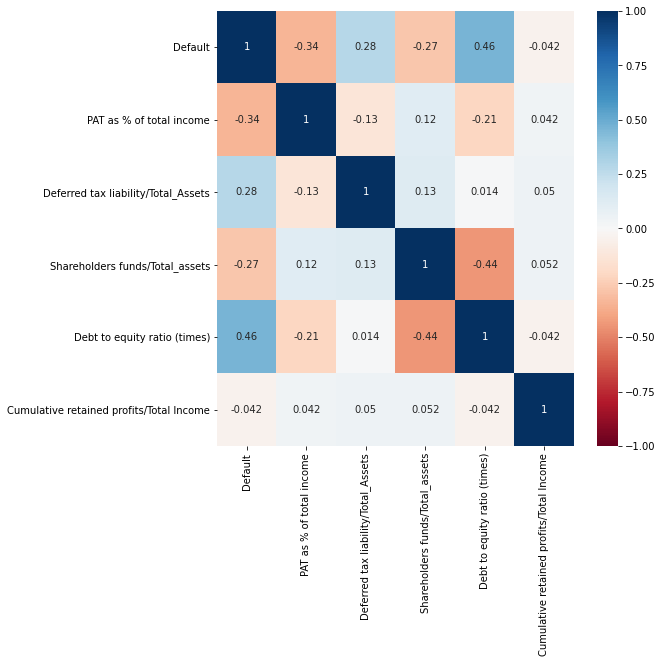

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(dev_data_select3.corr() , vmin = -1 , cmap = 'RdBu', annot = True)

In [ ]:
dev_data_select3 = sm.tools.tools.add_constant(dev_data_select3)

dev_data_select3.head()

,const,Default,PAT as % of total income,Deferred tax liability/Total_Assets,Shareholders funds/Total_assets,Debt to equity ratio (times),Cumulative retained profits/Total Income
0,1.0,1,-28.7076,0.0243,0.078541,26.78,-0.402369
1,1.0,1,-11.5200,0.0068,0.053313,12.98,-0.014696
2,1.0,1,-23.6600,0.0149,0.451905,13.31,-0.178117
3,1.0,1,-5.9000,0.0385,0.070874,5.48,-0.013685
4,1.0,1,-10.6600,0.0669,0.179729,15.91,-0.144332


In [ ]:
train_features = (dev_data_select3.columns).tolist()
train_features.remove('Default')

features_columns=train_features
dev_data_select3.head()

,const,Default,PAT as % of total income,Deferred tax liability/Total_Assets,Shareholders funds/Total_assets,Debt to equity ratio (times),Cumulative retained profits/Total Income
0,1.0,1,-28.7076,0.0243,0.078541,26.78,-0.402369
1,1.0,1,-11.5200,0.0068,0.053313,12.98,-0.014696
2,1.0,1,-23.6600,0.0149,0.451905,13.31,-0.178117
3,1.0,1,-5.9000,0.0385,0.070874,5.48,-0.013685
4,1.0,1,-10.6600,0.0669,0.179729,15.91,-0.144332


In [ ]:
logit_model_attempt3 = sm.Logit(dev_data_select3[Target_val],dev_data_select3[features_columns])
result_attempt3 = logit_model_attempt3.fit()
print(result_attempt3.summary())

Optimization terminated successfully.
         Current function value: 0.131040
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2409
Model:                          Logit   Df Residuals:                     2403
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.4842
Time:                        07:21:26   Log-Likelihood:                -315.68
converged:                       True   LL-Null:                       -611.97
Covariance Type:            nonrobust   LLR p-value:                8.054e-126
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8

In [ ]:
result_attempt3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2409
Model:                          Logit   Df Residuals:                     2403
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.4842
Time:                        07:22:52   Log-Likelihood:                -315.68
converged:                       True   LL-Null:                       -611.97
Covariance Type:            nonrobust   LLR p-value:                8.054e-126
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8018      0.249     -7.250      0.000      -2.289      -1.315
PAT as % of total income                    -0.0996      0.009    -10.894      0.000      -0.118      -0.082
Deferred tax liability/Total_Assets          0.0950      0.011      8.416      0.000       0.073       0.117
Shareholders funds/Total_assets             -6.1595      0.761     -8.096      0.000      -7.651      -4.668
Debt to equity ratio (times)                 0.0934      0.019      5.043      0.000       0.057       0.130
Cumulative retained profits/Total Income    -0.0117      0.008     -1.389      0.165      -0.028       0.005
============================================================================================================
"""

In [ ]:
Pred = result_attempt3.predict(dev_data_select3[features_columns])

In [ ]:
Pred.round()

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
2404    0.0
2405    0.0
2406    0.0
2407    0.0
2408    0.0
Length: 2409, dtype: float64

In [ ]:
 from sklearn.metrics import accuracy_score
 
accuracy_score(dev_data_select3[Target_val], Pred.round())

0.9572436695724367

# Thank You ! Rudhra